# Classification Exercises

In [1]:
import pandas as pd
import numpy as np
from pydataset import data

Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data('iris') # load the dataset and store it in a variable

In [3]:
data('iris', show_doc=True) # view the documentation for the dataset

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

#### 1a. Print the first 3 rows

In [4]:
print(df_iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


#### 1b. Print the number of rows and columns (shape)

In [5]:
print(df_iris.shape)

(150, 5)


#### 1c. Print the column names

In [6]:
for col in df_iris.columns: 
    print(col) 

Sepal.Length
Sepal.Width
Petal.Length
Petal.Width
Species


#### 1d. Print the data type of each column

In [7]:
print(df_iris.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object


#### 1e. Print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [8]:
print(df_iris.describe())
#The data should NOT be rescaled. The difference in magnitude of the data stored in each column is relatively small and the data itself is all measured in the same unit (cm)

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Question Two
Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [9]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')

In [10]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [11]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


#### 2a. Assign the first 100 rows to a new dataframe, df_excel_sample

In [12]:
df_excel_sample = df_excel.head(100)

#### 2b. Print the number of rows of your original dataframe

In [13]:
print(df_excel.shape[0])

7049


#### 2c. Print the first 5 column names

In [14]:
print(df_excel.columns[:5])

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')


#### 2d. Print the column names that have a data type of object.

In [15]:
df_excel = df_excel.astype({"is_senior_citizen": "object", "phone_service": "object", 
         "internet_service": "object", "contract_type": "object"})

In [16]:
df_excel.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'churn'],
      dtype='object')

#### 2e. Compute the range for each of the numeric variables.

In [17]:
df_excel[['monthly_charges']].max() - df_excel[['monthly_charges']].min()

monthly_charges    100.5
dtype: float64

In [18]:
df_excel[['total_charges']].max() - df_excel[['total_charges']].min()

total_charges    8666.0
dtype: float64

In [19]:
telco_stats = df_excel.describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [20]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


### Question Three
Read the data from this google sheet into a dataframe, df_google

In [21]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google= pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3a. Print the first 3 rows

In [22]:
print(df_google.iloc[:3])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


#### 3b. Print the number of rows and columns

In [23]:
print(df_google.shape)

(891, 12)


#### 3c. Print the column names

In [24]:
print(df_google.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### 3d. Print the data type of each column

In [25]:
print(df_google.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### 3e. Print the summary statistics for each of the numeric variables

In [26]:
df_google = df_google.astype({'PassengerId': 'object', 'Survived': 'object', 'Pclass': 'object'})
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


In [27]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### 3f. Print the unique values for each of your categorical variables

In [28]:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

PassengerId has 891 unique values.
Survived has 2 unique values.
Pclass has 3 unique values.
Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [29]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [30]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [32]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [33]:
print(df_google.Ticket.unique())

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

In [34]:
print(df_google.Cabin.unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


# Aquire.py Functions

In [35]:
from env import host, user, password
import os

Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [36]:
def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [37]:
def new_titanic_data():
    sql_query = 'SELECT * FROM passengers'
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    df.to_csv('titanic_df.csv')
    return df

In [38]:
def get_titanic_data(cached=False):
    '''
    This function reads in titanic data from Codeup database if cached == False
    or if cached == True reads in titanic df from a csv file, returns df
    '''
    if cached or os.path.isfile('titanic_df.csv') == False:
        df = new_titanic_data()
    else:
        df = pd.read_csv('titanic_df.csv', index_col=0)
    return df

In [39]:
titanic_df = get_titanic_data(cached=False)

In [40]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


Make a function named `get_iris_data` that returns the data from the iris_db on the codeup data science database as a pandas DataFrame. The returned DataFrame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [41]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df,
    writes it to a csv file, and returns the df.
    '''
    sql_query = """
                SELECT species_id,
                species_name,
                sepal_length,
                sepal_width,
                petal_length,
                petal_width
                FROM measurements
                JOIN species
                USING(species_id)
                """
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    df.to_csv('iris_df.csv')
    return df

In [42]:
def get_iris_data(cached=False):
    '''
    This function reads in iris data from Codeup database if cached == False
    or if cached == True reads in iris df from a csv file, returns df
    '''
    if cached or os.path.isfile('iris_df.csv') == False:
        df = new_iris_data()
    else:
        df = pd.read_csv('iris_df.csv', index_col=0)
    return df

In [43]:
iris_df = get_iris_data(cached=False)

In [44]:
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


# Prepare Exercises

## Question One
#### Iris Data

1. Use the function defined in acquire.py to load the iris data.

In [71]:
df = get_iris_data()

In [72]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


2. Drop the species_id and measurement_id columns.

In [73]:
df.drop(columns=['species_id'], inplace=True) #There is no measurement_id column

In [74]:
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


3. Rename the species_name column to just species.

In [77]:
df.rename(columns={"species_name": "species"}, inplace=True)

In [79]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


4. Create dummy variables of the species name.

In [80]:
df_dummies = pd.get_dummies(df[['species']])
df_dummies.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [81]:
df = pd.concat([df, df_dummies], axis=1)
df.drop(columns=['species'], inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [82]:
def prep_iris(df):
    # drop and rename columns
    df = df.drop(columns='species_id').rename(columns={'species_name': 'species'})
    
    # create dummy columns for species
    species_dummies = pd.get_dummies(df.species)
    
    # add dummy columns to df
    df = pd.concat([df, species_dummies], axis=1)
    
    return df

# Exploratory Analysis Exercises

Use the iris dataset. 

#### Split your data into train, test, and validate samples.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [46]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [47]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [48]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.species)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.species)

In [49]:
print(train.head())
print(validate.head())
print(test.head())

     sepal_length  sepal_width  petal_length  petal_width     species
80            5.7          2.6           3.5          1.0  versicolor
37            5.5          3.5           1.3          0.2      setosa
134           6.3          2.8           5.1          1.5   virginica
96            5.7          3.0           4.2          1.2  versicolor
19            5.7          3.8           1.7          0.3      setosa
     sepal_length  sepal_width  petal_length  petal_width     species
135           6.1          2.6           5.6          1.4   virginica
63            6.0          2.2           4.0          1.0  versicolor
99            5.1          2.5           3.0          1.1  versicolor
67            5.6          3.0           4.5          1.5  versicolor
122           5.6          2.8           4.9          2.0   virginica
     sepal_length  sepal_width  petal_length  petal_width     species
81            5.5          2.4           3.8          1.1  versicolor
46            4.8   

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [50]:
iris_train_melted = train.melt(id_vars=['species'], var_name='measurements', value_name='centimeters')
iris_train_melted

,species,measurements,centimeters
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

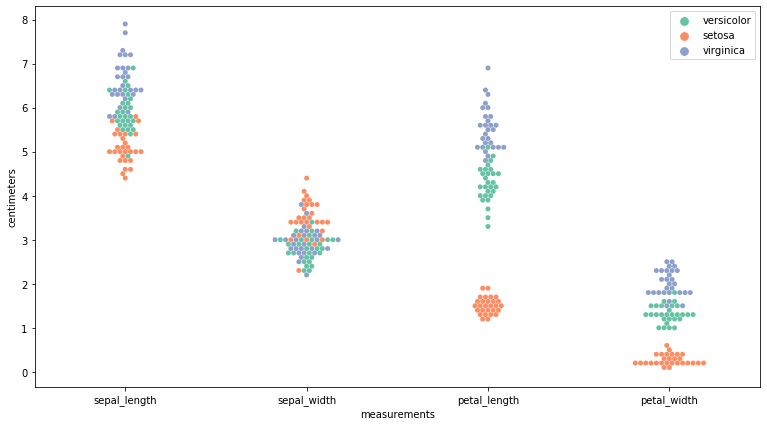

In [52]:
plt.figure(figsize=(13,7))
sns.swarmplot(x="measurements", y="centimeters", data=iris_train_melted, hue="species", palette="Set2")
plt.legend()

In [53]:
#Sepal width is the most clustered and difficult to use to distinguish species
#Petal length is stratified by species well, and petal length can be used to identify setosa vs veriscolo/virginica in particular
#For sepal_length, petal_length, and petal_width, the three species follow a pattern of shortest to longest (setosa, versicolor, virginica)
#Sepal width does not follow the same pattern

Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

What are your takeaways?

In [54]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
80,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
37,5.5,3.5,1.3,0.2,setosa,19.25,0.26
134,6.3,2.8,5.1,1.5,virginica,17.64,7.65
96,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
19,5.7,3.8,1.7,0.3,setosa,21.66,0.51


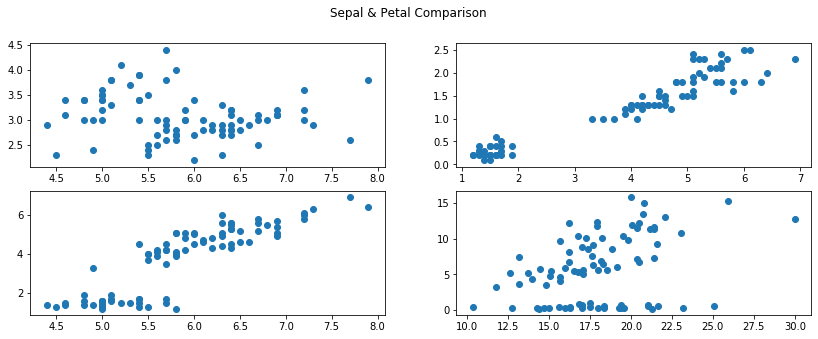

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(14, 5))
fig.suptitle('Sepal & Petal Comparison')
axs[0, 0].scatter(train.sepal_length, train.sepal_width)
axs[0, 1].scatter(train.petal_length, train.petal_width)
axs[1, 0].scatter(train.sepal_length, train.petal_length)
axs[1, 1].scatter(train.sepal_area, train.petal_area)

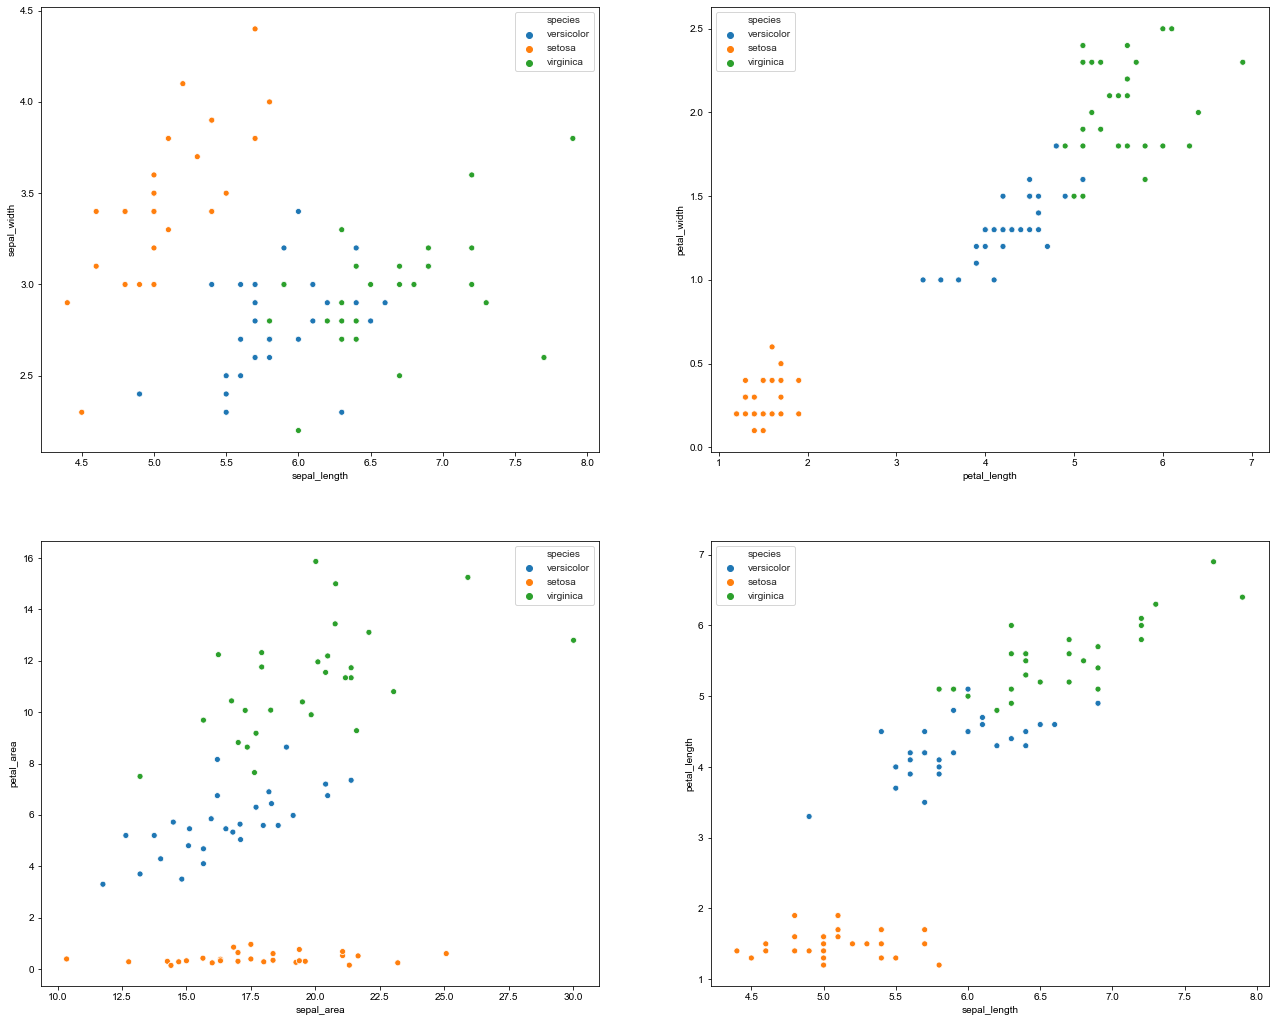

In [56]:
#create a figure "fig" with axis "ax1" with 2x2 configuration
fig, ax1 = plt.subplots(2,2, figsize=(22,18)) 

# 1st plot
sns.set_style("whitegrid");
sns.scatterplot(data=train, x="sepal_length", y="sepal_width", hue="species", ax=ax1[0, 0], legend='brief') 

# 2nd plot
sns.scatterplot(data=train, x="petal_length", y="petal_width", hue="species", ax=ax1[0, 1], legend='brief') 

# 3rd plot
sns.scatterplot(data=train, x="sepal_area", y="petal_area", hue="species", ax=ax1[1, 0], legend='brief') 

# 4th plot
sns.scatterplot(data=train, x="sepal_length", y="petal_length", hue="species", ax=ax1[1, 1], legend='brief') 

#### Create a heatmap of each variable layering correlation coefficient on top.

In [57]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


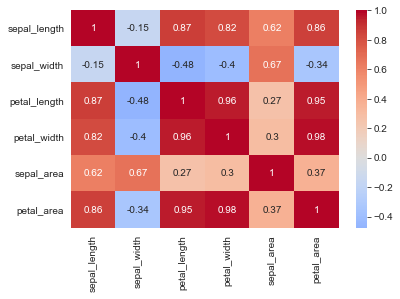

In [58]:
sns.heatmap(train.corr(), cmap='coolwarm', center = 0, annot=True)

In [59]:
# Most measures correlate with each other
# Sepal_area doesn't correlate strongly with other measures
# Sepal_width doesn't correlate strongly with other meansures

#### Create a scatter matrix visualizing the interaction of each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc1056d990>,
      dtype=object)

<Figure size 1728x1152 with 0 Axes>

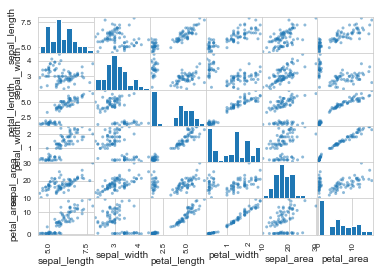

In [60]:
plt.figure(figsize=(24,16))
pd.plotting.scatter_matrix(train)

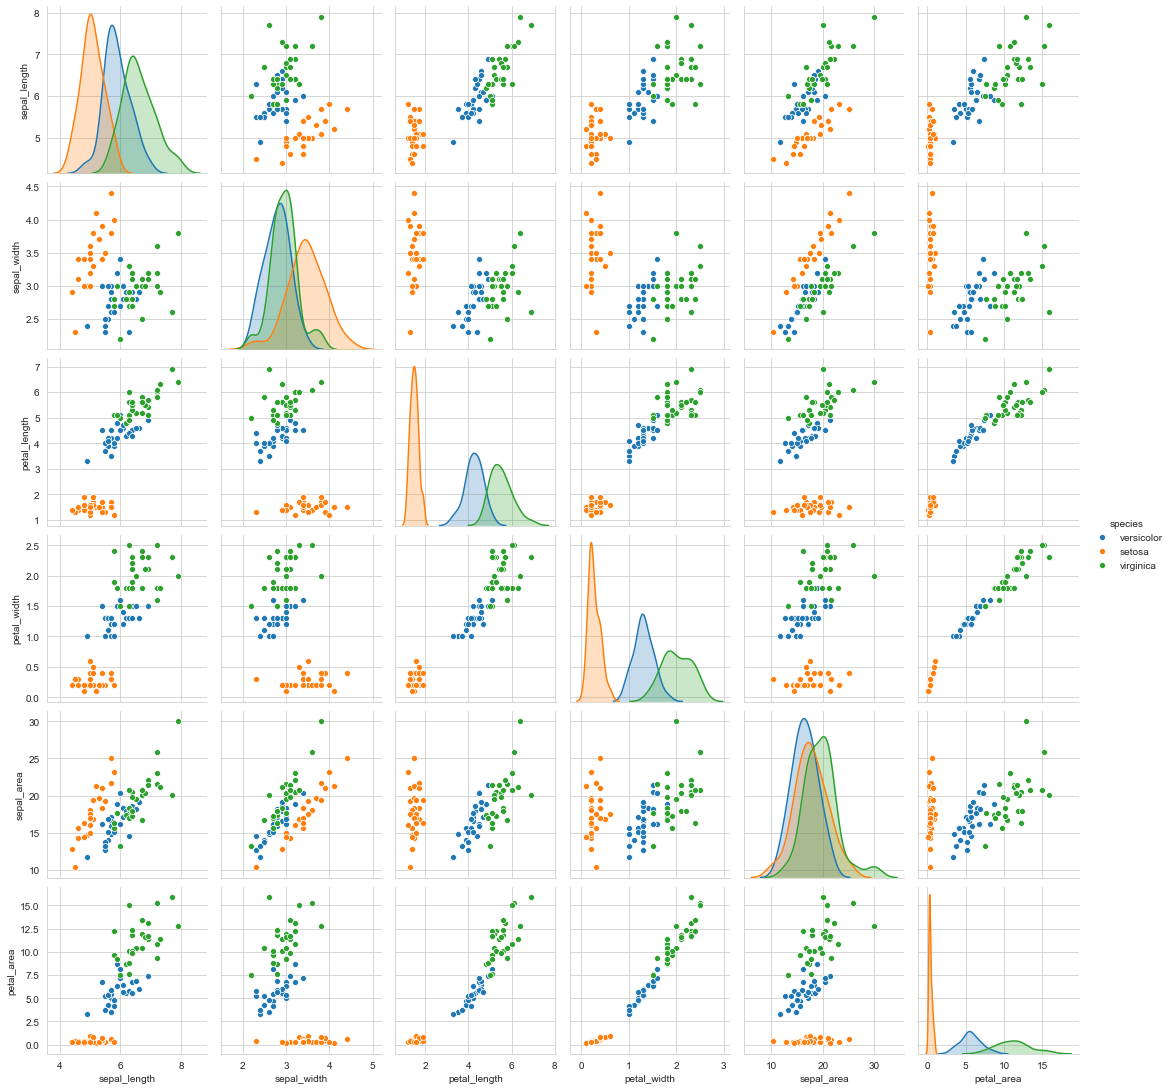

In [61]:
sns.pairplot(train, hue='species')

#### Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

What is your takeaway from this statistical testing?

In [62]:
# alpha = 0.05
# H0: sepal length is the same in virginica and versicolor
# Ha: sepal length significantly differrent in vriginica and versicolor

In [63]:
import scipy.stats as stats

In [64]:
# 2variables: species (categorical) + sepal_length (continuous) -- t-test is appropriate
# comparing the means of two separate groups (two-sample t-test)

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [65]:
train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [66]:
print(virginica.sepal_length.var(), versicolor.sepal_length.var())

0.283425925925926 0.18109788359788362


In [67]:
t, p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)
print('t=', t, 'p=', p)

t= 5.656491804882077 p= 6.024259917536193e-07


##### Conclusion: We reject the null hypothesis that the sepal length is the same for both groups